In [1]:
# Import packages
import pandas as pd
import seaborn as sns

# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
# Subset just Chinstrap penguins from data set

chinstrap_penguins = penguins[penguins["species"] == "Chinstrap"]

In [8]:
# Reset index of dataframe

chinstrap_penguins.reset_index(inplace = True, drop = True)

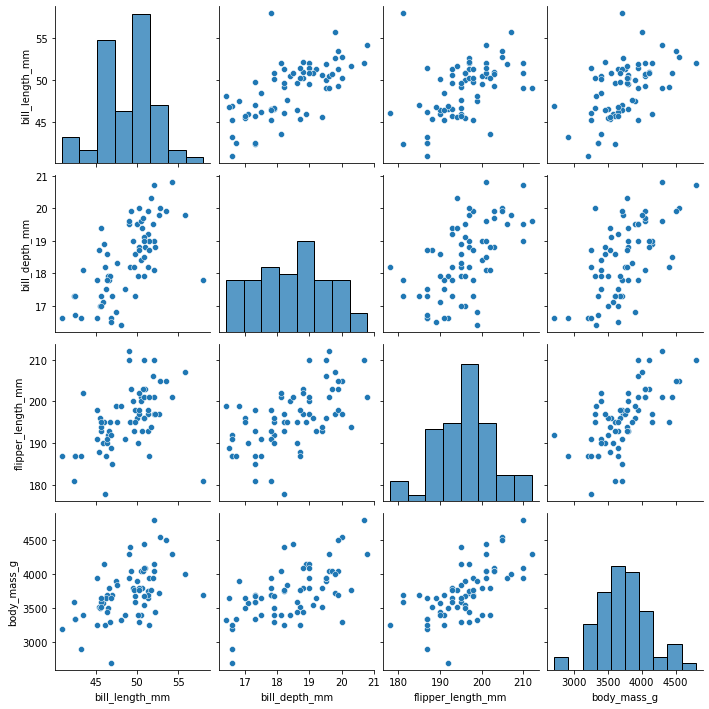

In [11]:
# Create pairwise scatterplots of data set
sns.pairplot(chinstrap_penguins)

In [13]:
ols_data = chinstrap_penguins[["bill_depth_mm", "flipper_length_mm"]]

In [14]:
#Y dependant comes first Then tilde followed by X Independant
ols_formula = "flipper_length_mm ~ bill_depth_mm"

In [15]:
# Import ols function
from statsmodels.formula.api import ols

In [16]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.48
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.16e-07
Time:                        13:31:20   Log-Likelihood:                -215.62
No. Observations:                  68   AIC:                             435.2
Df Residuals:                      66   BIC:                             439.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       128.6967     11.623     11.073      0.000     105.492     151.902
bill_depth_mm     3.6441      0.630      5.786      0.000       2.387       4.902
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.837
Skew:                          -0.255   Prob(JB):                        0.658
Kurtosis:                       3.190   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

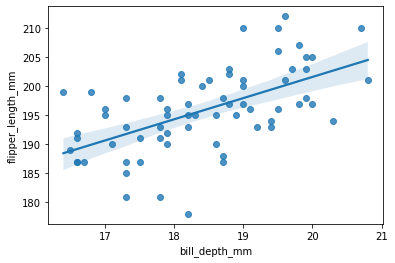

In [17]:
sns.regplot(x = "bill_depth_mm", y = "flipper_length_mm", data = ols_data)

## shaded region around the line indicating the uncertainty around the model estimates. 

In [19]:
# Subset X variable
X = ols_data["bill_depth_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [20]:
# Calculate residuals
residuals = model.resid

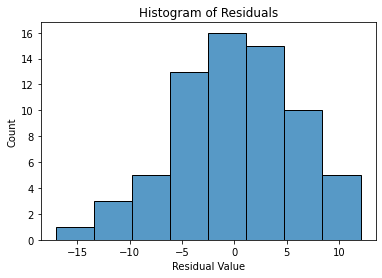

In [21]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

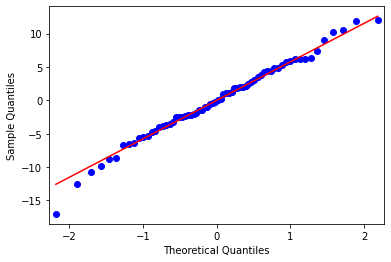

In [22]:
# The Q-Q plot shows a similar pattern to the histogram, 
#where the residuals are mostly normally distributed, 
#except at the ends of the distribution.
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

### Check the homoscedasticity assumption

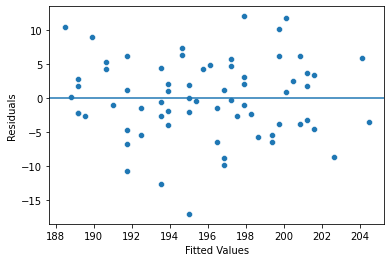

In [23]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()